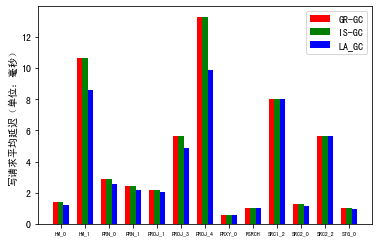

In [3]:
import numpy as np
import seaborn as sns
import sys
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
import pandas as pd
import scipy
import os
import sys
import matplotlib.pyplot as plt
from pylab import * 
import math
from numpy import cumsum

%matplotlib inline

#数据输入
def get_trace_reference(filename):
    
    file_base = open(filename)
    
    flag=0
    
    x = []
    
    while 1:
        
        base_lines = file_base.readlines(100000)
             
        if (not base_lines):
            
            break 
            
        for base_line in base_lines:

            if str(base_line).startswith("write request average response time:"): #以write request average response time:的行
                number = int(base_line.split()[5]) / 1e6
                x.append(number)

    file_base.close()
    
    return x


base1 = get_trace_reference("stat1.txt")
base2 = get_trace_reference("stat2.txt")
gc = get_trace_reference("stat3.txt")
labels = ["HM_0","HM_1","PRN_0","PRN_1","PROJ_1","PROJ_3","PROJ_4","PRXY_0","RSRCH","SRC1_2","SRC2_0","SRC2_2","STG_0"]
num = len(labels)  # the label locations
width = 0.35  # the width of the bars

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots()

all_width = 2 # 三个条柱的总宽度
width = onset = all_width / 3 # 偏移量是一个条柱的宽度

x1 = [x-onset for x in range(0,3*num,3)]
x2 = range(0,3*num,3)
x3 = [x+onset for x in range(0,3*num,3)]
# 绘图
ax.bar(x1, base1,onset,color='r', label='GR-GC')
ax.bar(x2, base2, onset,color='g', label='IS-GC')
ax.bar(x3, gc, onset, color='b',label='LA_GC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('写请求平均延迟（单位：毫秒）')
ax.set_xticks(range(0,3*num,3))
ax.set_xticklabels(labels,fontsize=6)
ax.legend()
plt.savefig("write_avg.png", bbox_inches = 'tight',dpi=1000)

In [11]:
shape(x1)

(12,)

In [12]:
shape(base1)


(13,)

In [14]:
len(base1)

13

In [15]:
base1

[1.411283,
 10.627171,
 2.882548,
 2.434125,
 2.183558,
 5.630843,
 13.302142,
 0.572071,
 1.032713,
 7.999644,
 1.261306,
 5.617203,
 1.000842]